In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense

import seaborn as sns 
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset and preprocess it
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/DS_FINAL/train.csv")
df = df.dropna()
df = pd.get_dummies(df, columns=['Gender', 'Geography'])

df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1

positive_train_data = df[df['Exited'] == 1].sample(frac=4, replace=True)
negative_train_data = df[df['Exited'] == 0].sample(frac=1)
print("Size of positive train data: "+ str(positive_train_data['Exited'].count()))
print("Size of negative train data:"+ str(negative_train_data['Exited'].count()))
train_data = pd.concat([positive_train_data,negative_train_data], axis=0)

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
min_values = train_data[continuous_vars].min()
max_values = train_data[continuous_vars].max()

train_data[continuous_vars] = (train_data[continuous_vars] - min_values) / (max_values - min_values)
print(train_data.head())
X = train_data.drop(['Exited','RowNumber','CustomerId','Surname'], axis=1).values
y = train_data['Exited'].values

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


Size of positive train data: 6528
Size of negative train data:6368
      RowNumber  CustomerId  Surname  CreditScore       Age  Tenure   Balance  \
6352       3305    15705458  Barclay     0.156352  0.301887     0.4  0.515142   
414        9797    15680685       Ma     0.338762  0.396226     0.6  0.626932   
4890       3488    15726354  Morrice     0.495114  0.056604     0.6  0.404661   
7521       1358    15784923    Myers     0.566775  0.396226     0.2  0.427455   
6090       1011    15626679    Milne     0.612378  0.056604     0.6  0.000000   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
6352       0.333333          1              -1         0.364359       1   
414        0.333333         -1              -1         0.736405       1   
4890       0.000000          1              -1         0.352621       1   
7521       0.000000          1               1         0.518552       1   
6090       0.666667         -1               1         0.842083       1

In [43]:
# Define the model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
258/258 [==============================] - 2s 4ms/step - loss: 0.6145 - accuracy: 0.6609 - val_loss: 0.5803 - val_accuracy: 0.7045
Epoch 2/100
258/258 [==============================] - 1s 4ms/step - loss: 0.5638 - accuracy: 0.7092 - val_loss: 0.5409 - val_accuracy: 0.7340
Epoch 3/100
258/258 [==============================] - 2s 6ms/step - loss: 0.5244 - accuracy: 0.7358 - val_loss: 0.5046 - val_accuracy: 0.7708
Epoch 4/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4977 - accuracy: 0.7528 - val_loss: 0.4842 - val_accuracy: 0.7670
Epoch 5/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4802 - accuracy: 0.7639 - val_loss: 0.4672 - val_accuracy: 0.7805
Epoch 6/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4716 - accuracy: 0.7706 - val_loss: 0.4630 - val_accuracy: 0.7805
Epoch 7/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4663 - accuracy: 0.7708 - val_loss: 0.4601 - val_accuracy: 0.7863

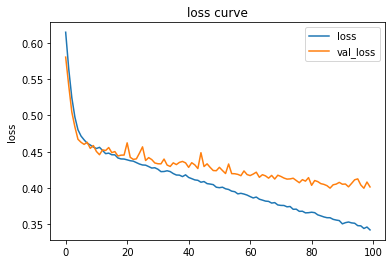

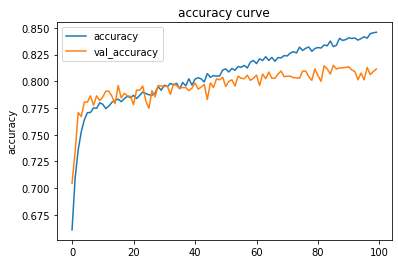

In [44]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [45]:
# Define the model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, min_delta=0, patience=10)
#early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[earlyStopping])

Epoch 1/100
258/258 [==============================] - 2s 4ms/step - loss: 0.6157 - accuracy: 0.6606 - val_loss: 0.5835 - val_accuracy: 0.7001
Epoch 2/100
258/258 [==============================] - 1s 3ms/step - loss: 0.5669 - accuracy: 0.7060 - val_loss: 0.5492 - val_accuracy: 0.7219
Epoch 3/100
258/258 [==============================] - 1s 3ms/step - loss: 0.5312 - accuracy: 0.7332 - val_loss: 0.5345 - val_accuracy: 0.7297
Epoch 4/100
258/258 [==============================] - 1s 3ms/step - loss: 0.5031 - accuracy: 0.7536 - val_loss: 0.4838 - val_accuracy: 0.7742
Epoch 5/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4834 - accuracy: 0.7645 - val_loss: 0.4712 - val_accuracy: 0.7781
Epoch 6/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4770 - accuracy: 0.7673 - val_loss: 0.4717 - val_accuracy: 0.7757
Epoch 7/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4677 - accuracy: 0.7708 - val_loss: 0.4603 - val_accuracy: 0.7820

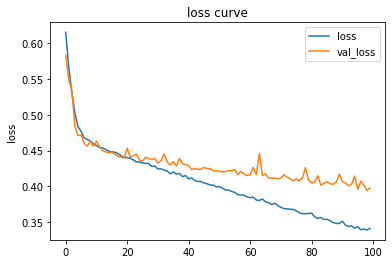

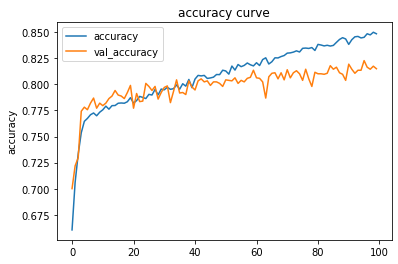

In [46]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

81/81 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8112
Test accuracy: 0.8112403154373169
81/81 [==============================] - 0s 1ms/step


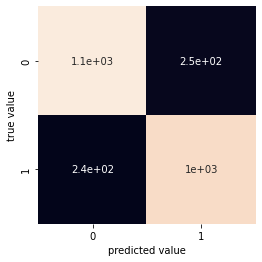

In [47]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat,square= True, annot=True, cbar= False)

plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()